In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('../datasets/non_pca_weather_scores_w_avgs.csv')
df

,schedule_date,schedule_season,home_id,away_id,weather_temperature,weather_wind_mph,score_home,home_avg_first_downs,home_avg_yds,home_avg_pass_yds,...,score_away,away_avg_first_downs,away_avg_yds,away_avg_pass_yds,away_avg_rush_yds,away_avg_TO,total_score,over_under_line,label,encoded_label
0,1/14/1968,1967,GNB,RAI,60.0,12.0,33,17.647059,304.117647,167.764706,...,14,17.764706,361.764706,218.705882,143.058824,2.352941,47,43.0,over,-1
1,1/12/1969,1968,CLT,NYJ,66.0,12.0,7,18.411765,332.529412,203.941176,...,16,18.705882,365.470588,247.411765,118.058824,1.823529,23,40.0,under,1
2,1/11/1970,1969,KAN,MIN,55.0,14.0,23,17.823529,315.470588,165.117647,...,7,16.941176,293.705882,162.176471,131.529412,2.235294,30,39.0,under,1
3,1/17/1971,1970,CLT,DAL,59.0,11.0,16,17.058824,301.470588,201.411765,...,13,16.117647,306.823529,139.647059,167.176471,2.000000,29,36.0,under,1
4,1/16/1972,1971,DAL,MIA,34.0,18.0,24,19.823529,342.000000,179.000000,...,3,16.294118,311.176471,146.647059,164.529412,1.705882,27,34.0,under,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9682,12/27/2020,2020,HTX,CIN,72.0,0.0,31,20.117647,373.470588,279.058824,...,37,20.882353,336.000000,232.529412,103.470588,1.411765,68,46.0,over,-1
9683,1/3/2021,2020,DET,MIN,72.0,0.0,35,21.588235,347.529412,249.294118,...,37,22.941176,378.764706,243.235294,135.529412,1.470588,72,53.5,over,-1
9684,1/3/2021,2020,HTX,OTI,72.0,0.0,38,20.529412,379.176471,287.411765,...,41,23.588235,390.470588,227.235294,163.235294,0.705882,79,55.5,over,-1
9685,1/3/2021,2020,CLT,JAX,72.0,0.0,28,22.411765,372.000000,246.823529,...,14,19.588235,327.705882,234.411765,93.294118,1.529412,42,48.0,under,1


In [4]:
cols = ['weather_temperature', 'weather_wind_mph', 'home_avg_first_downs', 'home_avg_yds', 'home_avg_pass_yds', 'home_avg_rush_yds', 'home_avg_TO', 'away_avg_first_downs', 'away_avg_yds', 'away_avg_pass_yds', 'away_avg_rush_yds', 'away_avg_TO']
features = df[cols]
features
features = StandardScaler().fit_transform(features)
features

array([[ 0.00626697,  0.82518334, -0.59174013, ...,  0.18693986,
         1.3754396 ,  0.92094221],
       [ 0.39542157,  0.82518334, -0.23620141, ...,  0.96843863,
         0.14057424, -0.12793504],
       [-0.31802853,  1.17433056, -0.50969273, ..., -1.3520362 ,
         0.80594875,  0.68785838],
       ...,
       [ 0.78457617, -1.26969998,  0.74836734, ...,  0.41914748,
         2.37204858, -2.34223146],
       [ 0.78457617, -1.26969998,  1.62353957, ...,  0.61452217,
        -1.08266885, -0.71064462],
       [ 0.20084427,  0.30146251,  2.00642742, ...,  2.63232637,
        -0.30978842, -1.40989612]])

In [5]:
labels = np.ravel(df['encoded_label'])
labels

array([-1,  1,  1, ..., -1,  1,  1], dtype=int64)

In [6]:
from sklearn.model_selection import cross_validate
rf = RandomForestClassifier()


cv_results = cross_validate(rf, features, labels, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'))

del cv_results['score_time']
del cv_results['fit_time']

for metric_name, values in cv_results.items():
    print(f'Metric: {metric_name}')
    #for val in values:
    #    print(f'\t{val}')
    print(f'\tMean: {np.mean(values)}')
    print(f'\tStandard Deviation: {np.std(values)}')


Metric: test_accuracy
	Mean: 0.5171894856246109
	Standard Deviation: 0.01556472707128666
Metric: test_precision
	Mean: 0.5299065519881957
	Standard Deviation: 0.015747667840939415
Metric: test_recall
	Mean: 0.5551057939171516
	Standard Deviation: 0.0614430960271784
Metric: test_f1
	Mean: 0.5405074013301869
	Standard Deviation: 0.03265215893228984


In [7]:
rf.fit(features, labels)

RandomForestClassifier()

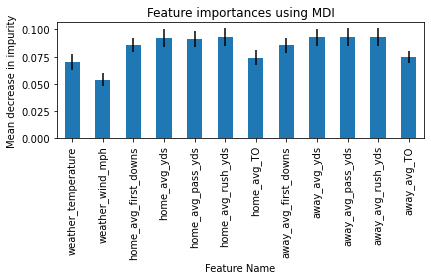

In [8]:
from matplotlib import pyplot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=cols)

fig, ax = pyplot.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Feature Name")
fig.tight_layout()